In [1]:
import NeuralNetwork as nnw
import numpy as np
import matplotlib.pyplot as plt

### Probando la red con una compuerta XOR

100%|██████████| 10000/10000 [00:00<00:00, 13316.50it/s]


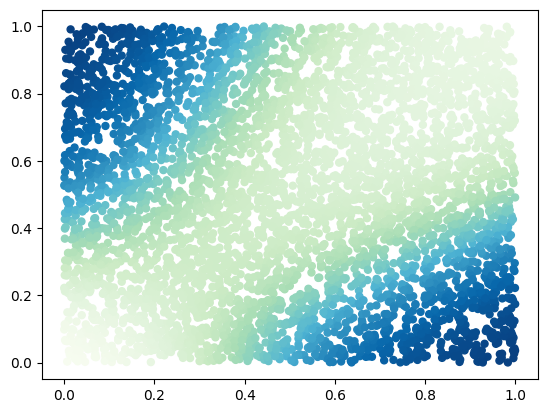

In [8]:
def random_points(n = 100):
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)

    return np.array([x, y]).T

red_xor = nnw.crear_modelo_de_red([2,3, 1])

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1],
])

Y = np.array([
    [0],
    [1],
    [1],
    [0],
])
#
funcion_de_activacion = nnw.sigmoide
red_entrenada = nnw.entrenar_red_neuronal(red_xor, funcion_de_activacion, nnw.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=10000, tasa_de_aprendizaje=0.08)
# 
x_test = random_points(n = 5000)
y_test = nnw.predecir(x_test, red_entrenada, funcion_de_activacion)
#
plt.scatter(x_test[:,0], x_test[:,1], c = y_test, s = 25, cmap='GnBu') # GnBu
plt.savefig('XOR_Fitted.jpg')

### Círculos

100%|██████████| 10000/10000 [00:02<00:00, 3450.19it/s]


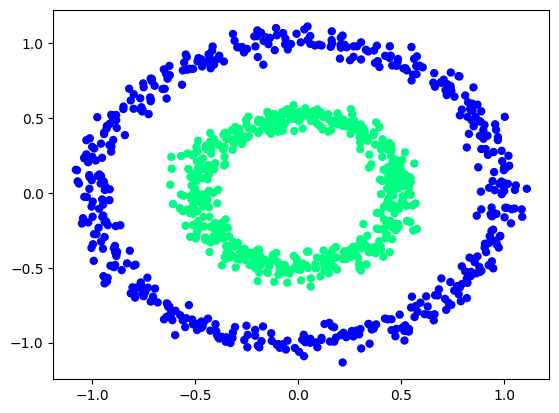

In [8]:
# CIRCLES
from sklearn.datasets import make_circles

red_circulos = nnw.crear_modelo_de_red([2, 4, 8, 1])

X, Y = make_circles(n_samples = 1000, noise = 0.05, factor = 0.5)
Y = Y.reshape(len(X), 1)
red_de_circulos_entrenada = nnw.entrenar_red_neuronal(red_circulos, nnw.sigmoide, nnw.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=10000, tasa_de_aprendizaje=0.05)
y_test = nnw.predecir(X, red_de_circulos_entrenada, nnw.sigmoide)
plt.scatter(X[:,0], X[:,1], c = y_test, cmap = 'winter', s = 25)

100%|██████████| 10000/10000 [00:02<00:00, 3457.95it/s]


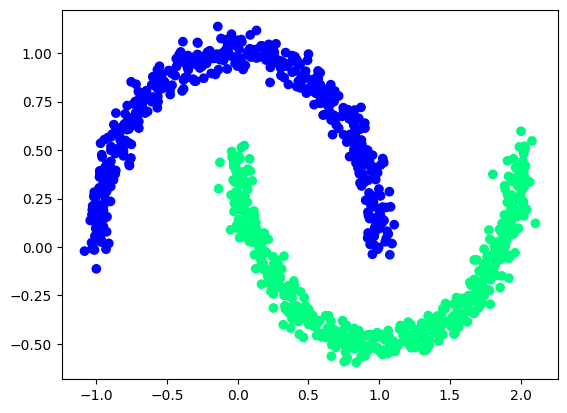

In [9]:
from sklearn.datasets import make_moons
red_lunas = nnw.crear_modelo_de_red([2, 4, 8, 1])

X, Y = make_moons(n_samples = 1000, noise = 0.05)
Y = Y.reshape(len(X), 1)
red_lunas_entrenada = nnw.entrenar_red_neuronal(red_lunas, nnw.sigmoide, nnw.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=10000, tasa_de_aprendizaje=0.05)

y_test = nnw.predecir(X, red_lunas_entrenada, nnw.sigmoide)
plt.scatter(X[:,0], X[:,1], c = y_test, cmap = 'winter')

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork
from keras.datasets import mnist
from keras.utils import np_utils

red_neuronal_imagenes = NeuralNetwork.crear_modelo_de_red([784, 16, 10])

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')

# normalizamos las entradas desde 0-255 a 0-1
X_train = X_train / 255
X_test = X_test / 255

# una codificacion en caliente a la salida
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_train.shape[1]

print([X_train.shape, Y_train.shape])

[(60000, 784), (60000, 10)]


In [16]:
red_imagenes_entrenada = NeuralNetwork.entrenar_red_neuronal(red_neuronal_imagenes,NeuralNetwork.sigmoide,NeuralNetwork.mean_squared_error,valor_de_prediccion=X_train, valor_real=Y_train, epochs=30, tasa_de_aprendizaje=0.05)

100%|██████████| 30/30 [00:30<00:00,  1.02s/it]


In [17]:
# X test
image_to_predict = 0
print(Y_train[image_to_predict])
# y_reslt = NeuralNetwork.predecir(X_test[3].reshape(1, 784), red_entrenada, NeuralNetwork.sigmoide)
y_reslt = NeuralNetwork.predecir(X_train[image_to_predict], red_imagenes_entrenada, NeuralNetwork.sigmoide)
print(y_reslt)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[0.00000000e+000 1.00000000e+000 1.00000000e+000 0.00000000e+000
  1.57338408e-006 0.00000000e+000 0.00000000e+000 5.79920725e-014
  9.43924866e-304 2.48503786e-206]]
